In [1]:
# Create Latitude and Longitude Combinations (6.1.4)

In [2]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from citipy import citipy
import requests as req
from config import weather_api_key

In [3]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=01de2342630b79332576e76c923ac747


In [4]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [5]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)
coordinates

[(-8.29188406131152, -66.29227032448276),
 (-21.626634998150706, -26.706297264725862),
 (60.07213555484242, 162.30971111928847),
 (60.01344799898601, -77.39590572341311),
 (-42.508497000723175, -129.0753057116753),
 (-3.556372092617636, -26.367105539121553),
 (-80.7485284794515, -128.93185667102142),
 (64.63771818190486, -170.24690625157257),
 (-3.596286368750228, -34.395305839588815),
 (2.9681409200199766, 74.95579297114315),
 (-55.51005105248864, -149.91194208681162),
 (-44.18356443491045, -0.43668210816343844),
 (36.729306892427985, -102.69338911725168),
 (14.230398056016725, -41.35784930215968),
 (-83.95224150201277, 153.61830432004945),
 (-75.84565379881988, 113.52296550297262),
 (34.76699240089816, -27.882050689996532),
 (83.20523889991085, 75.87774590629277),
 (-37.62542526617786, 10.714707045206694),
 (-51.31862455488283, -107.32072399657649),
 (-22.550713494448573, -59.70664871556461),
 (7.743894602430956, -99.79105005534159),
 (-88.62612975415821, 48.80102195992217),
 (49.381

In [6]:
# Use the tuple() function to display the latitude and longitude combinations.
for coordinate in coordinates:
    print(citipy.nearest_city(coordinate[0], coordinate[1]).city_name,
          citipy.nearest_city(coordinate[0], coordinate[1]).country_code)


pauini br
caravelas br
ossora ru
attawapiskat ca
rikitea pf
nisia floresta br
rikitea pf
lavrentiya ru
touros br
muli mv
mataura pf
cape town za
dumas us
cayenne gf
bluff nz
albany au
ponta delgada pt
dikson ru
cape town za
castro cl
filadelfia py
puerto escondido mx
port alfred za
penzance gb
carnarvon au
new norfolk au
khatanga ru
dunedin nz
asau tv
kapaa us
sicamous ca
amderma ru
busselton au
mtwara tz
dengzhou cn
bethel us
avarua ck
illoqqortoormiut gl
punta arenas cl
yellowknife ca
ushuaia ar
canatlan mx
faanui pf
rikitea pf
albany au
port elizabeth za
castro cl
esperance au
new norfolk au
cidreira br
mahebourg mu
merauke id
rikitea pf
hambantota lk
cherskiy ru
vaini to
nikolskoye ru
yellowknife ca
lagoa pt
mount gambier au
puerto ayora ec
sinnamary gf
aklavik ca
rikitea pf
awbari ly
palabuhanratu id
busselton au
ushuaia ar
smithers ca
slave lake ca
attawapiskat ca
port alfred za
dingle ie
lagoa pt
qaanaaq gl
punta arenas cl
samusu ws
quelimane mz
ushuaia ar
saint-philippe re
boo 

ushuaia ar
thompson ca
kodiak us
rikitea pf
yanchukan ru
georgetown sh
punta arenas cl
carnarvon au
rapid valley us
jiuquan cn
rikitea pf
ushuaia ar
rikitea pf
hasaki jp
okhotsk ru
marcona pe
rikitea pf
ushuaia ar
marsh harbour bs
cabo san lucas mx
punta arenas cl
katsuura jp
taolanaro mg
saint-augustin ca
vostok ru
mataura pf
mataura pf
tuktoyaktuk ca
khatanga ru
guadalupe y calvo mx
southbridge nz
rikitea pf
ankang cn
jidong cn
antalaha mg
vaini to
kamenka ru
taolanaro mg
rikitea pf
coquimbo cl
luderitz na
maragheh ir
rikitea pf
tuktoyaktuk ca
ushuaia ar
fort stewart us
mar del plata ar
albany au
punta arenas cl
rikitea pf
biskamzha ru
mutoko zw
rikitea pf
dikson ru
umm lajj sa
moose factory ca
ushuaia ar
hermanus za
pevek ru
atuona pf
abu kamal sy
nhulunbuy au
illoqqortoormiut gl
rikitea pf
lebu cl
jamestown sh
kapaa us
chara ru
torbay ca
yulara au
wanaka nz
namibe ao
port alfred za
atuona pf
sentyabrskiy ru
nerchinskiy zavod ru
belushya guba ru
ushuaia ar
rikitea pf
saskylakh ru
ne

guerrero negro mx
rikitea pf
taolanaro mg
cape town za
hithadhoo mv
qaanaaq gl
rikitea pf
albany au
avera pf
arlit ne
olafsvik is
beruni uz
ushuaia ar
vaini to
nanortalik gl
daoukro ci
ponta do sol pt
sentyabrskiy ru
ushuaia ar
bukama cd
neiafu to
ushuaia ar
kibala ao
colwyn bay gb
turtas ru
hermanus za
rikitea pf
mar del plata ar
cape town za
dingle ie
lorengau pg
albany au
bredasdorp za
chuy uy
ushuaia ar
thompson ca
wakkanai jp
chuy uy
rio cuarto ar
maceio br
ushuaia ar
ulaanbaatar mn
chokurdakh ru
saskylakh ru
sao joao br
hilo us
souillac mu
avera pf
clyde river ca
nakhon phanom th
saskylakh ru
banjarmasin id
maldonado uy
sokoni tz
rikitea pf
haines junction ca
klaksvik fo
east london za
busselton au
nueva loja ec
bilibino ru
albany au
satitoa ws
nikolskoye ru
geraldton au
cabo san lucas mx
korla cn
albany au
victoria sc
butaritari ki
padang id
thompson ca
bengkulu id
vozhega ru
meyungs pw
grand river south east mu
margate za
asau tv
hobart au
bitkine td
bluff nz
butaritari ki
senn

In [7]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

602

In [8]:
# Import Dependencies, and Initialize an Empty List and Counters (6.2.6)

In [9]:
# Import the datetime module from the datetime library.
from datetime import datetime

In [10]:
# Create an empty list to hold the weather data.
city_data = []

# Create counters
record_count = 1
set_count = 1

# Print the beginning of the logging
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Loop through all the cities in the list.

for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1


# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = req.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | pauini
Processing Record 2 of Set 1 | caravelas
Processing Record 3 of Set 1 | ossora
Processing Record 4 of Set 1 | attawapiskat
City not found. Skipping...
Processing Record 5 of Set 1 | rikitea
Processing Record 6 of Set 1 | nisia floresta
Processing Record 7 of Set 1 | lavrentiya
Processing Record 8 of Set 1 | touros
Processing Record 9 of Set 1 | muli
Processing Record 10 of Set 1 | mataura
Processing Record 11 of Set 1 | cape town
Processing Record 12 of Set 1 | dumas
Processing Record 13 of Set 1 | cayenne
Processing Record 14 of Set 1 | bluff
Processing Record 15 of Set 1 | albany
Processing Record 16 of Set 1 | ponta delgada
Processing Record 17 of Set 1 | dikson
Processing Record 18 of Set 1 | castro
Processing Record 19 of Set 1 | filadelfia
Processing Record 20 of Set 1 | puerto escondido
Processing Record 21 of Set 1 | port alfred
Processing Record 22 of Set 1 | penzance
Processing R

Processing Record 41 of Set 4 | xifeng
Processing Record 42 of Set 4 | meulaboh
Processing Record 43 of Set 4 | ulaangom
Processing Record 44 of Set 4 | zwedru
Processing Record 45 of Set 4 | tocopilla
Processing Record 46 of Set 4 | sentyabrskiy
City not found. Skipping...
Processing Record 47 of Set 4 | itacoatiara
Processing Record 48 of Set 4 | marcona
City not found. Skipping...
Processing Record 49 of Set 4 | louisbourg
City not found. Skipping...
Processing Record 50 of Set 4 | rio gallegos
Processing Record 1 of Set 5 | port lincoln
Processing Record 2 of Set 5 | hobyo
Processing Record 3 of Set 5 | maniwaki
Processing Record 4 of Set 5 | prainha
Processing Record 5 of Set 5 | mar del plata
Processing Record 6 of Set 5 | vostok
Processing Record 7 of Set 5 | aberystwyth
Processing Record 8 of Set 5 | port hardy
Processing Record 9 of Set 5 | ambon
Processing Record 10 of Set 5 | mariental
Processing Record 11 of Set 5 | dongsheng
Processing Record 12 of Set 5 | hope
Processing 

Processing Record 29 of Set 8 | abu kamal
Processing Record 30 of Set 8 | nhulunbuy
Processing Record 31 of Set 8 | chara
Processing Record 32 of Set 8 | wanaka
Processing Record 33 of Set 8 | namibe
Processing Record 34 of Set 8 | nerchinskiy zavod
Processing Record 35 of Set 8 | nemuro
Processing Record 36 of Set 8 | humberto de campos
Processing Record 37 of Set 8 | bundaberg
Processing Record 38 of Set 8 | cuauhtemoc
Processing Record 39 of Set 8 | necochea
Processing Record 40 of Set 8 | batsfjord
Processing Record 41 of Set 8 | sao joao da barra
Processing Record 42 of Set 8 | cabadiangan
Processing Record 43 of Set 8 | ternate
Processing Record 44 of Set 8 | piltene
Processing Record 45 of Set 8 | singarayakonda
Processing Record 46 of Set 8 | rafaela
Processing Record 47 of Set 8 | north bend
Processing Record 48 of Set 8 | manaure
Processing Record 49 of Set 8 | chambas
Processing Record 50 of Set 8 | meyungs
City not found. Skipping...
Processing Record 1 of Set 9 | novoagans

Processing Record 16 of Set 12 | okato
Processing Record 17 of Set 12 | amga
Processing Record 18 of Set 12 | ratnagiri
Processing Record 19 of Set 12 | kazachinskoye
Processing Record 20 of Set 12 | halalo
City not found. Skipping...
Processing Record 21 of Set 12 | san quintin
Processing Record 22 of Set 12 | faro
Processing Record 23 of Set 12 | wuzhou
Processing Record 24 of Set 12 | okakarara
Processing Record 25 of Set 12 | arlit
Processing Record 26 of Set 12 | olafsvik
Processing Record 27 of Set 12 | beruni
City not found. Skipping...
Processing Record 28 of Set 12 | nanortalik
Processing Record 29 of Set 12 | daoukro
Processing Record 30 of Set 12 | bukama
Processing Record 31 of Set 12 | neiafu
Processing Record 32 of Set 12 | kibala
Processing Record 33 of Set 12 | colwyn bay
Processing Record 34 of Set 12 | turtas
Processing Record 35 of Set 12 | wakkanai
Processing Record 36 of Set 12 | rio cuarto
Processing Record 37 of Set 12 | maceio
Processing Record 38 of Set 12 | ul

In [11]:
# Get the length of the appended list
len(city_data)

555

In [12]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)

# Rearrange column order
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df[new_column_order]

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Pauini,BR,2021-09-24 01:53:32,-7.7136,-66.9764,76.23,81,48,2.37
1,Caravelas,BR,2021-09-24 01:53:32,-17.7125,-39.2481,71.04,62,65,9.53
2,Ossora,RU,2021-09-24 01:53:33,59.2353,163.0719,53.15,57,19,1.99
3,Rikitea,PF,2021-09-24 01:53:33,-23.1203,-134.9692,74.12,78,100,23.24
4,Nisia Floresta,BR,2021-09-24 01:53:33,-6.0911,-35.2086,79.61,83,21,9.78
...,...,...,...,...,...,...,...,...,...
550,Bitkine,TD,2021-09-24 01:56:33,11.9801,18.2138,72.95,78,100,7.70
551,Senneterre,CA,2021-09-24 01:56:33,48.3835,-77.2328,53.82,99,100,6.69
552,Deer Lake,CA,2021-09-24 01:56:34,49.1667,-57.4316,49.86,100,90,10.36
553,Karratha,AU,2021-09-24 01:53:29,-20.7377,116.8463,84.81,28,1,4.45


In [13]:
# Create the output file (CSV). 
output_data_file = "weather_data/cities.csv"

# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [14]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]


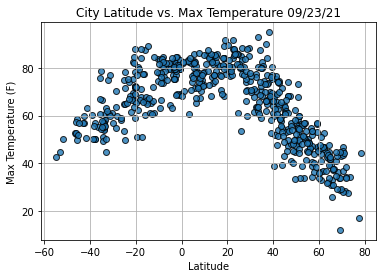

In [15]:
# Create the scatterplot for Max Temp
# Import the time module.
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()


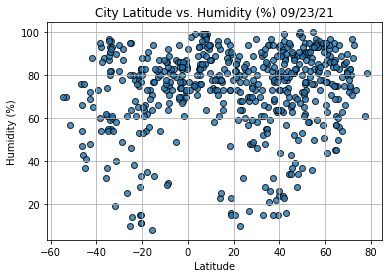

In [16]:
# Create the scatterplot for Humidity by refactoring the code
# Import the time module.
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity (%) "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig2.png")

# Show plot.
plt.show()

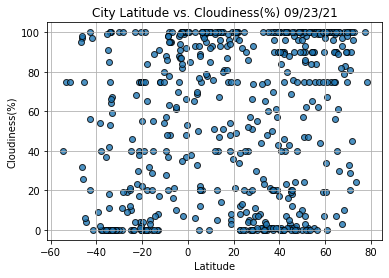

In [17]:
# Create the scatterplot for cloudiness
# Import the time module.
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness(%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness(%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig3.png")

# Show plot.
plt.show()

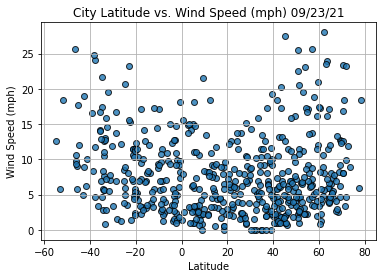

In [18]:
# Create the scatterplot for Windspeed
# Import the time module.
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed (mph) "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig4.png")

# Show plot.
plt.show()

In [26]:
northern_hemi_df = city_data_df.loc[city_data_df["Lat"] >= 0]
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
2,Ossora,59.2353,163.0719,53.15,57,19,1.99,RU,2021-09-24 01:53:33
5,Lavrentiya,65.5833,-171.0000,33.08,69,100,5.17,RU,2021-09-24 01:53:34
7,Muli,2.9167,73.5667,83.32,75,93,14.81,MV,2021-09-24 01:53:34
10,Dumas,35.8656,-101.9732,74.53,26,1,9.22,US,2021-09-24 01:53:35
11,Cayenne,4.9333,-52.3333,82.09,83,0,1.01,GF,2021-09-24 01:53:35


In [29]:
southern_hemi_df = city_data_df.loc[city_data_df["Lat"] <= 0]
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Pauini,-7.7136,-66.9764,76.23,81,48,2.37,BR,2021-09-24 01:53:32
1,Caravelas,-17.7125,-39.2481,71.04,62,65,9.53,BR,2021-09-24 01:53:32
3,Rikitea,-23.1203,-134.9692,74.12,78,100,23.24,PF,2021-09-24 01:53:33
4,Nisia Floresta,-6.0911,-35.2086,79.61,83,21,9.78,BR,2021-09-24 01:53:33
6,Touros,-5.1989,-35.4608,79.70,79,61,15.05,BR,2021-09-24 01:53:34


In [30]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

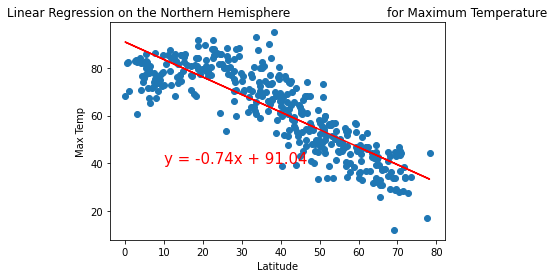

In [34]:
# Linear regression on the Northern Hemisphere (6.4.2)
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]

# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(10,40))


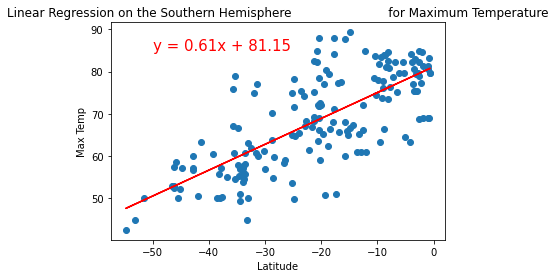

In [51]:
# Linear regression on the Southern Hemisphere (6.4.2)
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]

# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(-50,85))

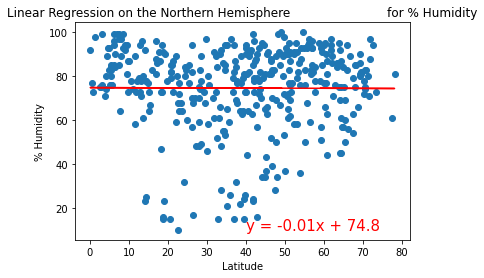

In [52]:
# Humidity : Linear regression on the Northern Hemisphere (6.4.2)
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]

# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Humidity', '% Humidity',(40,10))

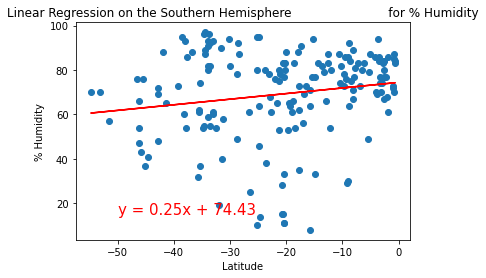

In [54]:
# Humidity : Linear regression on the Southern Hemisphere (6.4.2)
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]

# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Humidity', '% Humidity',(-50,15))

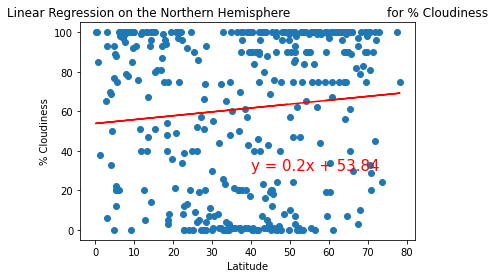

In [58]:
# Cloudiness : Linear regression on the Northern Hemisphere (6.4.2)
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]

# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(40,30))

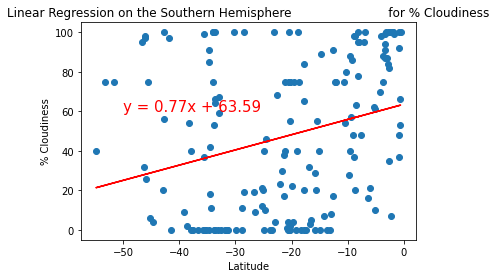

In [57]:
# Cloudiness : Linear regression on the Northern Hemisphere (6.4.2)
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]

# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(-50,60))

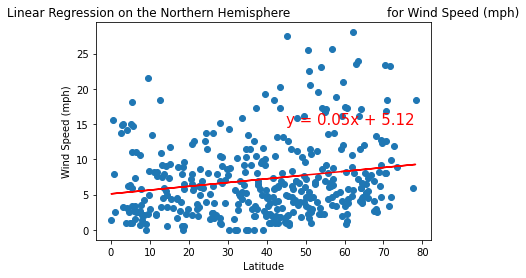

In [65]:
# Wind Speed : Linear regression on the Northern Hemisphere (6.4.2)
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]

# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Wind Speed (mph)', 'Wind Speed (mph)',(45,15))

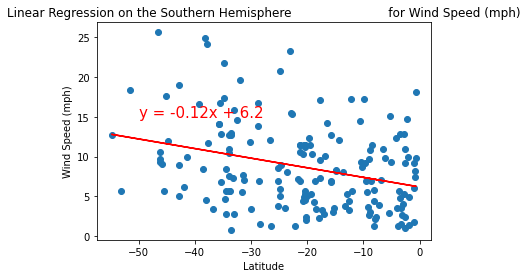

In [68]:
# Wind Speed : Linear regression on the Southern Hemisphere (6.4.2)
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]

# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Wind Speed (mph)', 'Wind Speed (mph)',(-50,15))